In [1]:
import numpy as np #deals with arrays
import matplotlib.pyplot as plt #plotting package
#%matplotlib inline
import xarray as xr #deals with multidimensional arrays
import seaborn as sns; sns.set(color_codes=True) # plotting aes
plt.style.use('ggplot')
import pandas as pd   #builds data frames
from pandas import DataFrame
from pandas import Grouper
import netCDF4 as nc  #deals with nc files
from mpl_toolkits.basemap import Basemap # plots maps
import csv     #outputs data as csv 
%config Completer.use_jedi = False

In [2]:
odata =  xr.open_dataset('/Volumes/WorkDrive/melt_dates/seaiceconc.nc')

In [3]:
latitude = odata.GridLat_SpPolarGrid12km
longitude = odata.GridLon_SpPolarGrid12km

In [4]:
ds = xr.open_dataset('/Volumes/WorkDrive/melt_dates/mean/mergedBUfiles.nc', decode_times=False)
#/Volumes/WorkDrive/melt_dates/NoIceEdge/netcdf/nan_netcdf/merged_years_nan.nc
#/Volumes/WorkDrive/melt_dates/mean/merged_years.nc

In [5]:
ds

<xarray.Dataset>
Dimensions:                        (time: 10, xgrid: 632, ygrid: 664)
Coordinates:
    longitude                      (ygrid, xgrid) float64 ...
    latitude                       (ygrid, xgrid) float64 ...
Dimensions without coordinates: time, xgrid, ygrid
Data variables:
    __xarray_dataarray_variable__  (time, ygrid, xgrid) int64 ...
Attributes:
    history:  Mon Jan 23 15:09:07 2023: ncecat -u time y12_break5d_30.nc y13_...
    NCO:      netCDF Operators version 5.1.0 (Homepage = http://nco.sf.net, C...

In [6]:
days = ds.__xarray_dataarray_variable__

In [9]:
graph= days.mean(dim='time')

In [10]:
#graph.plot()

## Let us get rid of the zeros 

In [11]:
ice = graph.values
ice = ice.astype(np.float32)
## now that our data is a numpy array, we can convert the zeros and two's into NaNs for a cleaner plot ##
BU_nan =  ice.copy()
BU_nan[BU_nan == 0.0] = np.nan
BU_nan[BU_nan == 1.0] = np.nan
BU_nan[BU_nan == 2.0] = np.nan
BU_nan[BU_nan == 3.0] = np.nan
BU_nan[BU_nan == 4.0] = np.nan
BU_nan[BU_nan == 5.0] = np.nan


breakup = xr.DataArray(BU_nan)

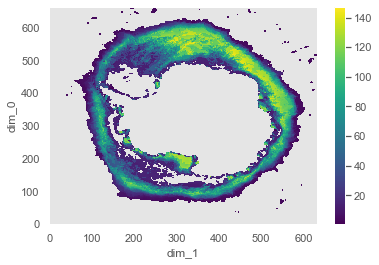

In [12]:
breakup.plot()

In [13]:
mean = xr.DataArray(breakup)
mean = xr.DataArray(data=breakup,
                     dims=["ygrid","xgrid"],
                     coords=dict(
                         longitudes=(["ygrid","xgrid"],longitude),
                         latitudes=(["ygrid","xgrid"],latitude),
                                ),
                     attrs=dict(description="Sea Ice Breakup Mean",
                               ),
                    )

In [14]:
mean.to_netcdf('/Volumes/WorkDrive/melt_dates/mean/data_mean_xr_30_5.nc')